# Random Forest
Random forest is consistent of many decision trees. It is an ensemble method. The final estimate come from voting the estimate of each decision tree. So Random Forest is an ensamble machine learning algorithm.
The randomness is from:
+ random subset of training samples
+ random subset of features

Each tree will use random subset samples and festures.

### Why random forest is better than a single decision tree?
+ randomness brings better resolution?
+ voting mecha

**Bagging**: Above shows the first 9 decision trees in the random forest. As we restrict max_depth=2 for all trees, these classification are considered to be "weak" ones. But we can get a "good" one by averaging these up (this is the voting process that is general for ensamble methods). Below shows the averaged classifier taking all the trees. Compare to one decision tree, we can see those anomilies (overfitting) almost disappeared and the decision boundary is closer to what a human wants to divide.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('data/binary_linearboundary.txt')
X = df.iloc[:,0:2]
y = df.iloc[:,2]
X1 = X.iloc[:,0];
X2 = X.iloc[:,1];

X1_test,X2_test = np.meshgrid(np.linspace(X1.min()-1,X1.max()+1,100),np.linspace(X2.min()-1,X2.max()+1,100))
X_test = np.vstack((X1_test.flatten(),X2_test.flatten())).T

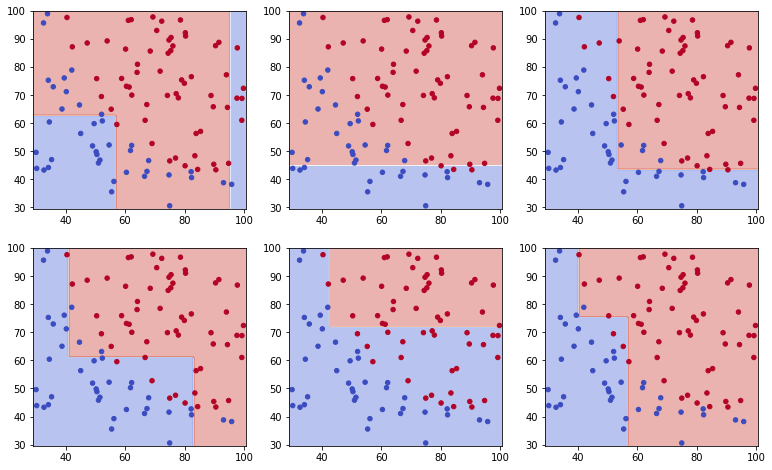

In [6]:
n_tree = 500
clf = RandomForestClassifier(n_estimators=n_tree,max_depth=2)
clf.fit(X,y)

Y_test_avg = np.zeros(X1_test.shape);

plt.figure(figsize=(13,8))
for i in np.arange(n_tree):
    clf_tree = clf.estimators_[i]
    y_test = clf_tree.predict(X_test)
    Y_test = y_test.reshape(X1_test.shape)
    
    Y_test_avg += Y_test
    
    if i < 6:
        plt.subplot(2,3,i+1)
        plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
        plt.scatter(X1,X2,c=y,s=20,edgecolor=None,cmap=plt.cm.coolwarm)    
plt.show()

Y_test_avg /= n_tree

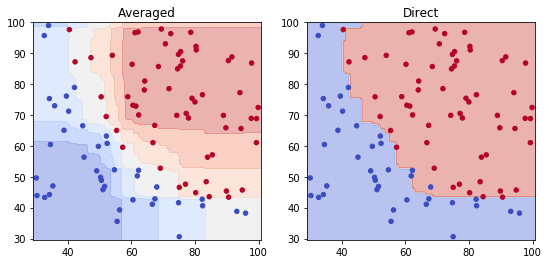

In [7]:
# give a sense of voting by averaging all the trees in the forest
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.contourf(X1_test, X2_test, Y_test_avg,cmap=plt.cm.coolwarm,alpha=0.4)
plt.scatter(X1,X2,c=y,s=20,edgecolor=None,cmap=plt.cm.coolwarm)    
plt.title('Averaged')
#
plt.subplot(1,2,2)
y_test = clf.predict(X_test)
Y_test = y_test.reshape(X1_test.shape)
plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
plt.scatter(X1,X2,c=y,s=20,edgecolor=None,cmap=plt.cm.coolwarm)   
plt.title('Direct')

plt.show()

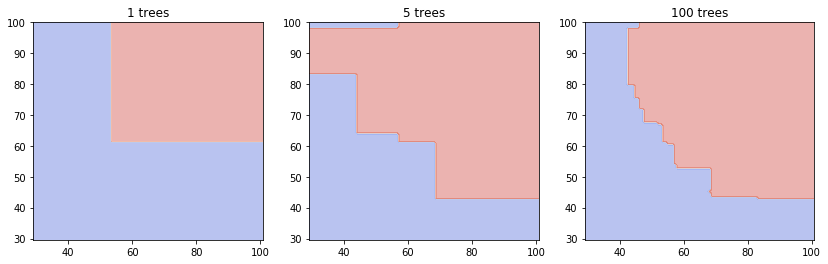

In [8]:
plt.figure(figsize=(14,4))
tree_numbers = np.array([1,5,100])
for i in np.arange(3):
    clf = RandomForestClassifier(n_estimators=tree_numbers[i],max_depth=2)
    clf.fit(X,y)
    y_test = clf.predict(X_test)
    Y_test = y_test.reshape(X1_test.shape)
    
    plt.subplot(1,3,i+1)
    plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
    plt.title('{} trees'.format(tree_numbers[i]))
plt.show()